# Aufgabe 34 Likelihoodkurve (numerischer Teil)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# matplotlib Einstellungen
%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (7,5)
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

## a) Plot der negativen Log-Likelihood-Funktion

In [3]:
k = [13,8,9]

In [4]:
# negative Log-Likelihood
def F(lam, k):
    return len(k)*lam - np.log(lam)*np.sum(k) + np.sum(np.log([math.factorial(k_i) for k_i in k]))

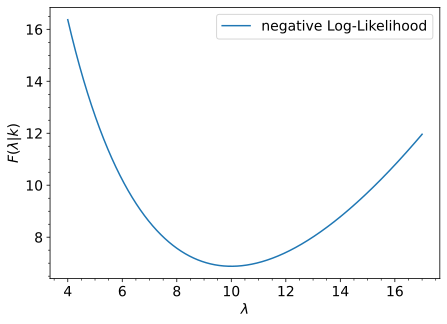

In [5]:
# plotten
lam = np.linspace(4,17, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()

## c) Schnittstellen mit $c \in \{ \frac{1}{2}, 2, \frac{9}{2} \}$ bestimmen

In [6]:
from scipy.optimize import root

In [7]:
lam0 = 10 # aus b)
c = [1/2, 2, 9/2]

In [8]:
# Schnittstellen bestimmen mit F(lam) - F(lam0) - c = 0
lam_left = []
lam_right = []
for c_i in c:
    res = root(lambda x: (F(x,k) - F(lam0,k) - c_i) , x0=[lam0-3,lam0+3])
    lam_left.append(res.x[0])
    lam_right.append(res.x[1])

print('Werte für Lambda:')
df = pd.DataFrame({'lower': lam_left, 'higher': lam_right}, index=[f'c={c_i}' for c_i in c])
df

Werte für Lambda:


,lower,higher
c=0.5,8.283637,11.938503
c=2,6.778765,14.108810
c=4.5,5.473703,16.519662


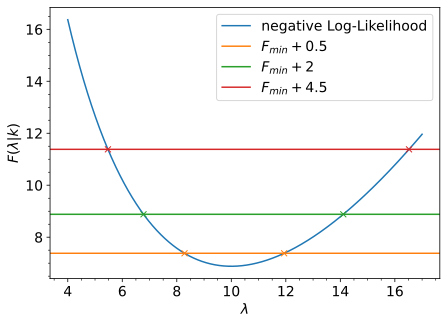

In [9]:
# plotten
lam = np.linspace(4,17, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.pop(0)
for c_i,color,left,right in zip(c,colors,lam_left,lam_right):
    plt.axhline(F(lam0,k)+c_i, color=color, label=r'$F_{min}'+f' + {c_i}$')
    plt.plot(left, F(lam0,k)+c_i, 'x', color=color)
    plt.plot(right, F(lam0,k)+c_i, 'x', color=color)
    
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()

### Was sagen diese $\lambda$ Werte aus?

Die Schnittstellen markieren die $1\sigma$, $2\sigma$ und $3\sigma$ Umgebungen unserer Schätzung für $\lambda$.

## d) Taylor-Entwicklung plotten und Schnittstellen aus c) berechnen

In [10]:
# Taylor-Entwicklung von F(lam)
def F_Taylor(lam,k, lam0):
    a = np.sum(k) # alpha
    N = len(k)
    return F(lam0,k) + (N-a/lam0)*(lam-lam0) + 1/2*a/lam0**2*(lam-lam0)**2

In [11]:
# analytische Nullstellen von F(lam) - F(lam0) - c = 0 , mit der Taylor-Entwicklung
def lam1(k,lam0,c):
    a = np.sum(k) # alpha
    N = len(k)
    return -(lam0**2*N/a - 2*lam0) + np.sqrt( (lam0**2*N/a - 2*lam0)**2 +2*lam0**3/a*(N-a/lam0) - lam0**2 + 2*lam0**2/a*c )

def lam2(k,lam0,c):
    a = np.sum(k) # alpha
    N = len(k)
    return -(lam0**2*N/a - 2*lam0) - np.sqrt( (lam0**2*N/a - 2*lam0)**2 +2*lam0**3/a*(N-a/lam0) - lam0**2 + 2*lam0**2/a*c )

In [12]:
# genäherte Schnittstellen berechnen
lam_left2 = []
lam_right2 = []
for c_i in c:
    lam_left2.append(lam2(k,lam0,c_i))
    lam_right2.append(lam1(k,lam0,c_i))
    
print('Schnittpunkte (Lambda):')
df['lower (Taylor)'] = lam_left2
df['higher (Taylor)'] = lam_right2
df

Schnittpunkte (Lambda):


,lower,higher,lower (Taylor),higher (Taylor)
c=0.5,8.283637,11.938503,8.174258,11.825742
c=2,6.778765,14.108810,6.348516,13.651484
c=4.5,5.473703,16.519662,4.522774,15.477226


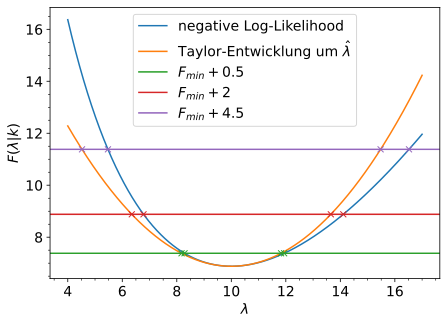

In [13]:
# plotten
lam = np.linspace(4,17, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')
plt.plot(lam, F_Taylor(lam, k, lam0), label=r'Taylor-Entwicklung um $\hat{\lambda}$')

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.pop(0)
colors.pop(0)
for c_i,color,left,right,left2,right2 in zip(c,colors,lam_left,lam_right,lam_left2,lam_right2):
    plt.axhline(F(lam0,k)+c_i, color=color, label=r'$F_{min}'+f' + {c_i}$')
    plt.plot(left, F(lam0,k)+c_i, 'x', color=color)
    plt.plot(right, F(lam0,k)+c_i, 'x', color=color)
    plt.plot(left2, F(lam0,k)+c_i, 'x', color=color)
    plt.plot(right2, F(lam0,k)+c_i, 'x', color=color)
    
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()

### Vergleich der Näherung mit der ungenäherten negativen Log-Likelihood-Funktion:

Wie bei Taylor-Entwicklungen üblich, wird die Näherung immer ungenauer, je weiter man sich vom Minimum entfernt.  
Allerdings werden kleinere Werte unterschätzt und größere Werte überschätzt.  
Die exakte Funktion ist asymmetrisch um das Minimum und die Taylor-Entwicklung 2ter Ordnung ist eine (symmetrische) Parabel.


### Wofür könnte die Näherung nützlich sein?

Die $1\sigma$ Umgebung der Schätzung wird immernoch recht genau berechnet.  
Eine solche Näherung könnte den Rechenaufwand deutlich verringern, da ansonsten die Schnittstellen numerisch bestimmt werden müssen.